In [1]:
#libs
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Table Map

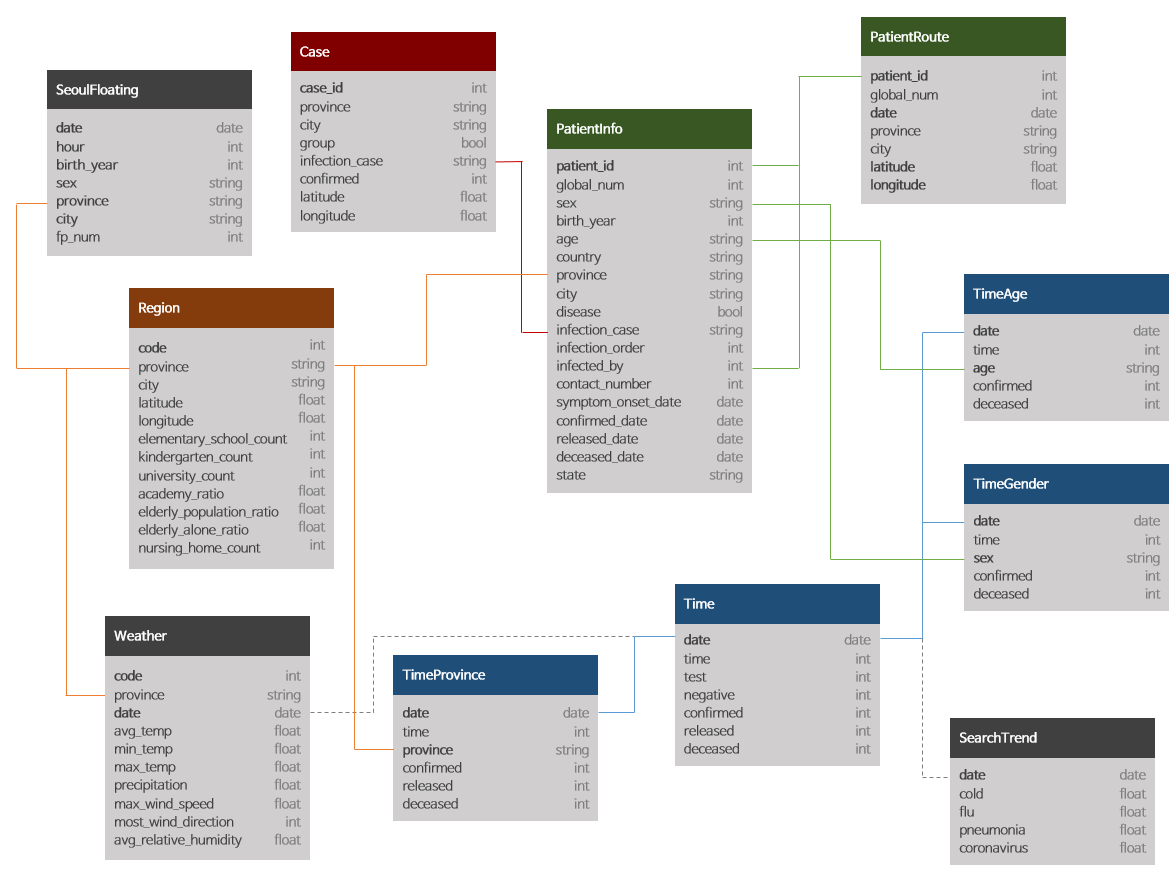

In [2]:
Image(filename="kcdcData/map.png")

# TimeProvince Table

### date
YYYY-MM-DD
### time
Time
### province
the province of South Korea
### confirmed
the accumulated number of the confirmed in the province
### released
the accumulated number of the released in the province
### deceased
the accumulated number of the deceased in the province

# Region Table
### code 
the code of the region
### province
Special City / Metropolitan City / Province(-do)
### city
City(-si) / Country (-gun) / District (-gu)
### latitude
the latitude of the visit (WGS84)
### longitude
the longitude of the visit (WGS84)
### elementary_school_count
the number of elementary schools
### kindergarten_count
the number of kindergartens
### university_count
the number of universities
### academy_ratio
the ratio of academies
### elderly_population_ratio
the ratio of the elderly population
### elderly_alone_ratio
the ratio of elderly households living alone
### nursing_home_count
the number of nursing homes

# Weather Table
### date 
YYYY-MM-DD
### avg_temp
the average temperature
### min_temp
the lowest temperature
### max_temp
the highest temperature
### precipitation
the daily precipitation
### max_wind_speed
the maximum wind speed
### most_wind_direction
the most frequent wind direction
### avg_relative_humidity
the average relative humidity

# SeoulFloating Table (Info on people floating people)

### birth_year
the birth year of the floating population
### sex
the sex of the floating population
### province
Special City / Metropolitan City / Province(-do)
### city
City(-si) / Country (-gun) / District (-gu)
### fp_num
the number of floating population

In [3]:

weather= pd.read_csv("kcdcData/Weather.csv").sort_values(by=['avg_temp']).reset_index()
weather=weather[weather.date.str.contains("2020")]
weather=weather.groupby(['province']).agg(avg_temp=('avg_temp', 'mean'),min_temp=('min_temp', 'mean'),max_temp=('max_temp', 'mean'),max_wind_speed=('max_wind_speed', 'mean'),precipitation=('precipitation', 'sum'),avg_relative_humidity=('avg_relative_humidity', 'mean')).reset_index()
weather

,province,avg_temp,min_temp,max_temp,max_wind_speed,precipitation,avg_relative_humidity
0,Busan,7.921348,4.157303,12.480899,6.619101,281.4,55.976404
1,Chungcheongbuk-do,3.000000,-2.619101,9.204494,3.837079,142.8,66.531461
2,Chungcheongnam-do,3.510112,-1.449438,9.071910,5.034831,141.3,68.848315
3,Daegu,5.933708,1.219101,11.410112,5.252809,135.1,60.093258
4,Daejeon,4.789888,-0.124719,10.531461,3.693258,194.1,64.682022
5,Gangwon-do,5.955056,2.070787,10.415730,5.358427,232.1,54.616854
6,Gwangju,6.171910,1.891011,11.475281,3.961798,166.2,64.243820
7,Gyeonggi-do,3.595506,-1.175281,8.859551,4.666292,139.7,76.733708
8,Gyeongsangbuk-do,5.738202,1.188764,10.957303,7.160674,184.3,59.778652
9,Gyeongsangnam-do,6.342697,2.135955,11.171910,4.735955,214.7,54.737079


In [4]:

regions = pd.read_csv('kcdcData/Region.csv')
regions.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [5]:
patients = pd.read_csv('kcdcData/PatientInfo.csv')
patients.head()


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [6]:

patients["died"]=patients.state=="deceased"
display(patients.head())




,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,died
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,False
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,False
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,False
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,False
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,False


In [7]:

RegionTotals = patients.groupby(['province','city']).agg(num_cases=('patient_id', 'count'),num_died=('died', 'sum')).reset_index()
RegionTotals.sort_values(by=['num_died']).reset_index()

,index,province,city,num_cases,num_died
0,0,Busan,Buk-gu,5,0.0
1,104,Gyeongsangnam-do,Yangsan-si,3,0.0
2,105,Incheon,Bupyeong-gu,15,0.0
3,106,Incheon,Dong-gu,2,0.0
4,107,Incheon,Gyeyang-gu,6,0.0
...,...,...,...,...,...
155,32,Daegu,Nam-gu,8,1.0
156,88,Gyeongsangbuk-do,Yeongcheon-si,36,1.0
157,1,Busan,Busanjin-gu,13,2.0
158,73,Gyeongsangbuk-do,Cheongdo-gun,43,7.0


In [8]:
regions = regions.merge(RegionTotals, on=['province','city'])


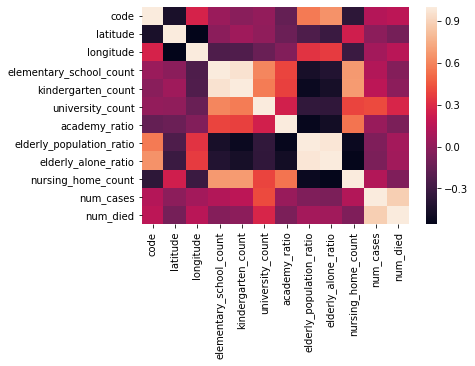

In [9]:
sns.heatmap(regions.corr())

# Account for city sizes

In [10]:
pop = pd.read_csv('kcdcData/Kpop.csv')
pop=pop.rename(columns={'By administrative divisions(eup, myeon, dong)':'city','Total population (Person)':'Total_Population'})
pop=pop[['Total_Population','city']]

In [11]:
merged = regions.merge(pop, on=['city'])
merged["elementary_school_count_ratio"]=merged["elementary_school_count"]/merged["Total_Population"]
merged["kindergarten_count_ratio"]=merged["kindergarten_count"]/merged["Total_Population"]
merged["university_count_ratio"]=merged["university_count"]/merged["Total_Population"]
merged["nursing_home_count_ratio"]=merged["nursing_home_count"]/merged["Total_Population"]
merged["num_cases_ratio"]=merged["num_cases"]/merged["Total_Population"]
merged["num_died_ratio"]=merged["num_cases"]/merged["Total_Population"]

In [12]:
merged

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,...,nursing_home_count,num_cases,num_died,Total_Population,elementary_school_count_ratio,kindergarten_count_ratio,university_count_ratio,nursing_home_count_ratio,num_cases_ratio,num_died_ratio
0,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,...,3088,38,0.0,507810,0.000065,0.000075,0.000000,0.006081,0.000075,0.000075
1,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,...,1023,9,0.0,414231,0.000065,0.000077,0.000000,0.002470,0.000022,0.000022
2,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,...,628,5,0.0,309138,0.000045,0.000068,0.000000,0.002031,0.000016,0.000016
3,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,...,1080,22,0.0,578539,0.000062,0.000097,0.000002,0.001867,0.000038,0.000038
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,...,1080,22,0.0,121351,0.000297,0.000461,0.000008,0.008900,0.000181,0.000181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,61120,Gyeongsangnam-do,Changnyeong-gun,35.544603,128.492330,17,20,0,0.80,29.80,...,129,9,0.0,62703,0.000271,0.000319,0.000000,0.002057,0.000144,0.000144
227,61130,Gyeongsangnam-do,Changwon-si,35.227992,128.681815,110,195,5,1.84,13.64,...,1701,26,0.0,1044215,0.000105,0.000187,0.000005,0.001629,0.000025,0.000025
228,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,...,94,1,0.0,67520,0.000237,0.000296,0.000000,0.001392,0.000015,0.000015
229,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,...,83,1,0.0,38005,0.000342,0.000316,0.000000,0.002184,0.000026,0.000026


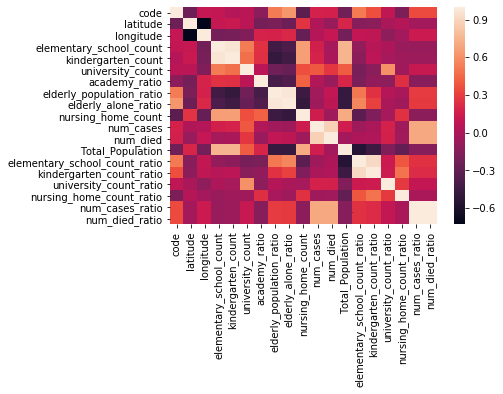

In [13]:
sns.heatmap(merged.corr())

# Merge in weather information

In [14]:
alldf = merged.merge(weather, on=['province'])
alldf.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,...,university_count_ratio,nursing_home_count_ratio,num_cases_ratio,num_died_ratio,avg_temp,min_temp,max_temp,max_wind_speed,precipitation,avg_relative_humidity
0,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,...,0.000000,0.006081,0.000075,0.000075,3.838202,-0.223596,8.630337,4.798876,129.9,53.530337
1,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,...,0.000000,0.002470,0.000022,0.000022,3.838202,-0.223596,8.630337,4.798876,129.9,53.530337
2,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,...,0.000000,0.002031,0.000016,0.000016,3.838202,-0.223596,8.630337,4.798876,129.9,53.530337
3,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,...,0.000002,0.001867,0.000038,0.000038,3.838202,-0.223596,8.630337,4.798876,129.9,53.530337
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,...,0.000008,0.008900,0.000181,0.000181,3.838202,-0.223596,8.630337,4.798876,129.9,53.530337


,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,...,university_count_ratio,nursing_home_count_ratio,num_cases_ratio,num_died_ratio,avg_temp,min_temp,max_temp,max_wind_speed,precipitation,avg_relative_humidity
code,1.000000,-0.237191,0.104312,0.096610,0.035234,0.065190,-0.117917,0.523884,0.622905,-0.317943,...,0.086021,-0.189383,0.349145,0.349145,0.089642,0.011064,0.153480,0.299330,0.068691,0.037037
latitude,-0.237191,1.000000,-0.730460,0.109696,0.127150,0.062332,-0.214892,-0.182995,-0.256343,0.260726,...,0.002567,0.041456,-0.032645,-0.032645,-0.876508,-0.761789,-0.888493,-0.298663,-0.722471,0.280322
longitude,0.104312,-0.730460,1.000000,-0.211790,-0.207613,-0.165919,0.186617,0.176243,0.209833,-0.271905,...,-0.110122,-0.031784,0.133082,0.133082,0.832208,0.687652,0.873773,0.169709,0.771564,-0.365648
elementary_school_count,0.096610,0.109696,-0.211790,1.000000,0.970135,0.520821,0.255337,-0.428809,-0.381846,0.657333,...,0.009632,-0.070457,-0.069491,-0.069491,-0.181079,-0.204559,-0.137667,-0.149560,-0.107378,0.377789
kindergarten_count,0.035234,0.127150,-0.207613,0.970135,1.000000,0.478711,0.246639,-0.489179,-0.438835,0.659202,...,-0.018344,-0.048663,-0.057009,-0.057009,-0.200624,-0.227280,-0.154988,-0.170680,-0.121258,0.438199
university_count,0.065190,0.062332,-0.165919,0.520821,0.478711,1.000000,0.060985,-0.231869,-0.264308,0.359688,...,0.607157,-0.045019,0.117618,0.117618,-0.105113,-0.138539,-0.037214,-0.109790,-0.009736,0.134867
academy_ratio,-0.117917,-0.214892,0.186617,0.255337,0.246639,0.060985,1.000000,-0.408611,-0.371562,0.430528,...,-0.111182,0.241218,-0.136865,-0.136865,0.199274,0.141083,0.225387,-0.150438,0.170893,0.041847
elderly_population_ratio,0.523884,-0.182995,0.176243,-0.428809,-0.489179,-0.231869,-0.408611,1.000000,0.973557,-0.452025,...,0.046238,-0.007283,0.290327,0.290327,0.156828,0.104863,0.213647,0.312903,0.009786,-0.219202
elderly_alone_ratio,0.622905,-0.256343,0.209833,-0.381846,-0.438835,-0.264308,-0.371562,0.973557,1.000000,-0.491569,...,0.004134,-0.048286,0.287102,0.287102,0.215892,0.164280,0.256300,0.342768,0.069774,-0.198431
nursing_home_count,-0.317943,0.260726,-0.271905,0.657333,0.659202,0.359688,0.430528,-0.452025,-0.491569,1.000000,...,-0.017088,0.251728,-0.119347,-0.119347,-0.257314,-0.245094,-0.219988,-0.265156,-0.230491,0.090523


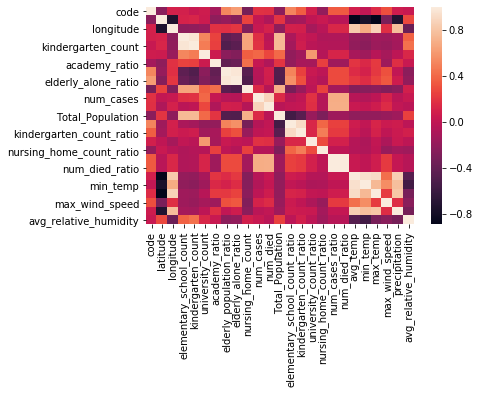

In [15]:
sns.heatmap(alldf.corr())
alldf.corr()

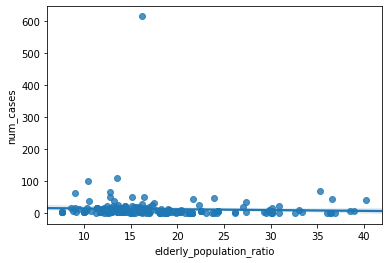

In [24]:
 sns.regplot(x="elderly_population_ratio", y="num_cases", data=alldf)

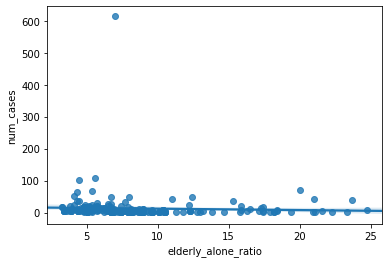

In [25]:
 sns.regplot(x="elderly_alone_ratio", y="num_cases", data=alldf)

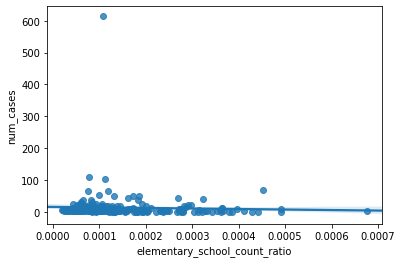

In [26]:
 sns.regplot(x="elementary_school_count_ratio", y="num_cases", data=alldf)

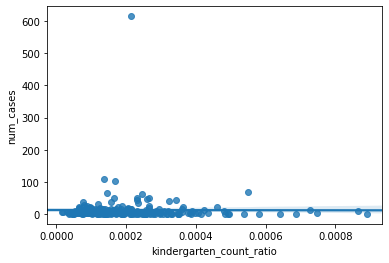

In [27]:
 sns.regplot(x="kindergarten_count_ratio", y="num_cases", data=alldf)

In [16]:

avg=alldf.num_cases_ratio.mean()
alldf["HighRisk"]=alldf.num_cases_ratio>avg

In [17]:
display(len(alldf[alldf.HighRisk==True]))
len(alldf[alldf.HighRisk==False])

37

194

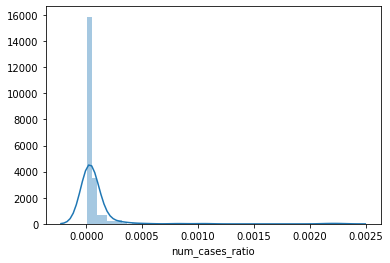

In [18]:
sns.distplot(alldf.num_cases_ratio)


In [19]:
X = alldf.drop('province',axis=1)
X = X.drop('city',axis=1)
X = X.drop('code',axis=1)
X = X.drop('latitude',axis=1)
X = X.drop('longitude',axis=1)
X = X.drop('num_cases',axis=1)
X = X.drop('num_died',axis=1)
X = X.drop('num_cases_ratio',axis=1)
X = X.drop('num_died_ratio',axis=1)
X = X.drop('kindergarten_count',axis=1)
X = X.drop('university_count',axis=1)
X = X.drop('nursing_home_count',axis=1)

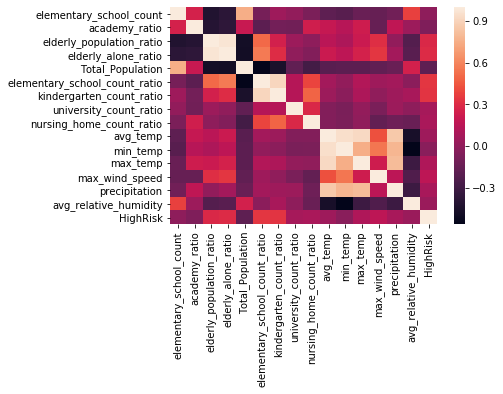

In [20]:
sns.heatmap(X.corr())


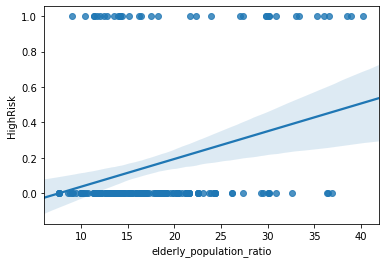

In [43]:
X = X.drop('HighRisk',axis=1)







alldf['HighRisk']=alldf['HighRisk'].astype(int)
y = alldf['HighRisk']
display(X.head())
display(y.head())

,elementary_school_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,Total_Population,elementary_school_count_ratio,kindergarten_count_ratio,university_count_ratio,nursing_home_count_ratio,avg_temp,min_temp,max_temp,max_wind_speed,precipitation,avg_relative_humidity
0,33,4.18,13.17,4.3,507810,0.000065,0.000075,0.000000,0.006081,3.838202,-0.223596,8.630337,4.798876,129.9,53.530337
1,27,1.54,14.55,5.4,414231,0.000065,0.000077,0.000000,0.002470,3.838202,-0.223596,8.630337,4.798876,129.9,53.530337
2,14,0.67,19.49,8.5,309138,0.000045,0.000068,0.000000,0.002031,3.838202,-0.223596,8.630337,4.798876,129.9,53.530337
3,36,1.17,14.39,5.7,578539,0.000062,0.000097,0.000002,0.001867,3.838202,-0.223596,8.630337,4.798876,129.9,53.530337
4,36,1.17,14.39,5.7,121351,0.000297,0.000461,0.000008,0.008900,3.838202,-0.223596,8.630337,4.798876,129.9,53.530337


0    0
1    0
2    0
3    0
4    1
Name: HighRisk, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
mlp = MLPClassifier(hidden_layer_sizes=(512,256,128,50, 10),max_iter=100000,solver="sgd")
print("training started")
mlp.fit(X_train,y_train)
print("training stoped")


training started
training stoped


In [86]:
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[91  6]
 [ 8 11]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        97
           1       0.65      0.58      0.61        19

    accuracy                           0.88       116
   macro avg       0.78      0.76      0.77       116
weighted avg       0.87      0.88      0.88       116



## ANN Results
the net can predict low risk cities mush better that it can predict highrisk cities

In [47]:
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9]
def depth_score(depth, weight) : 
    train_accs = []
    test_accs = []
    for i in depth:
        clf = DecisionTreeClassifier(max_depth=i, random_state=1, class_weight=weight)
        clf = clf.fit(X_train, y_train)
        # rows are the true classes, columns are the predicted classes 
#         display('train acc: ' + str(clf.score(X_train, y_train)))
        train_acc = clf.score(X_train, y_train)
        train_accs.append(train_acc)
#         display('test acc: ' + str(clf.score(X_test, y_test)))
        test_acc = clf.score(X_test, y_test)
        test_accs.append(test_acc)
#         y_pred = clf.predict(X_test)
#         display('Confusion Matrix:')
#         display(confusion_matrix(y_test, y_pred))
    return train_accs, test_accs
trains, tests = depth_score(depths, None)
trains_balanced, tests_balanced = depth_score(depths, 'balanced')

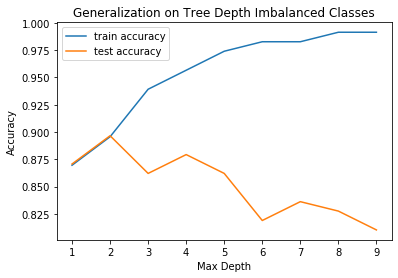

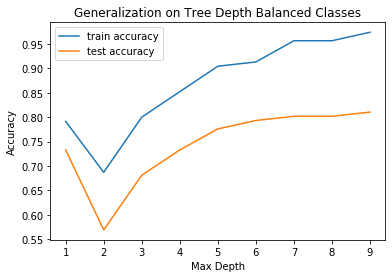

In [48]:
def gen_plot(depths, trains, tests, title):
    plt.plot(depths, trains)
    plt.plot(depths, tests)
    plt.ylabel('Accuracy')
    plt.xlabel('Max Depth')
    plt.legend(('train accuracy', 'test accuracy'))
    plt.title(title)
    plt.show()
    
gen_plot(depths, trains, tests, 'Generalization on Tree Depth Imbalanced Classes')
gen_plot(depths, trains_balanced, tests_balanced, 'Generalization on Tree Depth Balanced Classes')

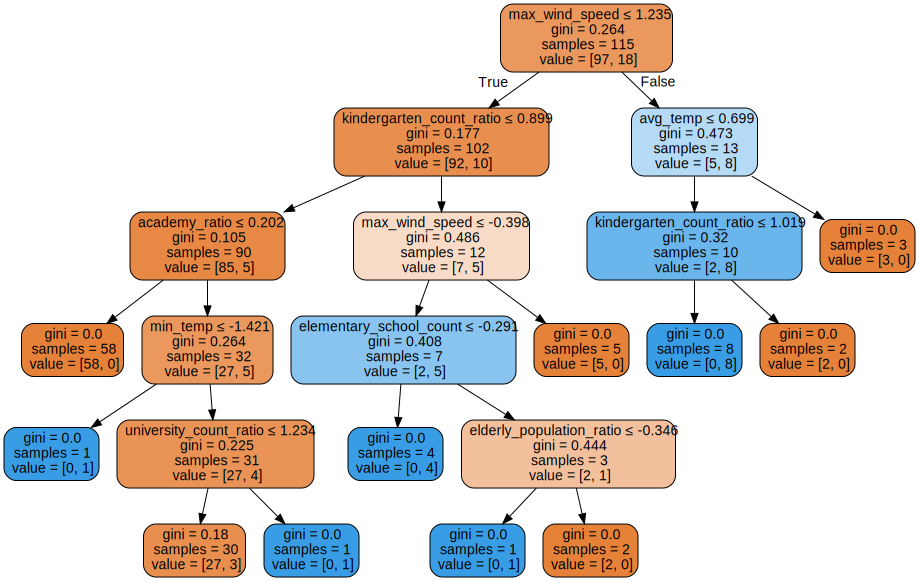

In [52]:
clf = DecisionTreeClassifier(max_depth=5, random_state=1, class_weight=None)
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
#                       feature_names=iris.feature_names, 
                        feature_names=X.columns,
#                       class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph .render("3deep")
graph

In [87]:
predictions = clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[90  7]
 [ 9 10]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        97
           1       0.59      0.53      0.56        19

    accuracy                           0.86       116
   macro avg       0.75      0.73      0.74       116
weighted avg       0.86      0.86      0.86       116

